In [ ]:
# Getting the data generators for the training and validation sets
import os
import sys

module_path = os.path.abspath('../utils')
print("Adding to sys.path:", module_path)
sys.path.append(module_path)

from data_prep import get_data_generators
train_gen, valid_gen, full_gen, _ = get_data_generators('../data/pokemon.csv', '../data/pokemon-img/pokemon/pokemon/')

In [ ]:
import matplotlib.pyplot as plt
x, y = next(train_gen)
print(x.shape, y.shape)

plt.imshow(x[2])
plt.show()

In [ ]:
# defining the model based on the base model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import TopKCategoricalAccuracy, AUC

model = models.Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(120,120,3)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2,2)),


    Flatten(),
    Dense(64, activation='relu'),
    Dense(18)
])

model.compile(
    optimizer=Adam(1e-4),
    loss=BinaryCrossentropy(from_logits=True),  # For multi-label
    metrics=[
        AUC(name='auc', multi_label=True),TopKCategoricalAccuracy(k=2)]
)
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 222, 222, 16)      448       
                                                                 
 batch_normalization_29 (Ba  (None, 222, 222, 16)      64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_30 (Conv2D)          (None, 109, 109, 32)      4640      
                                                                 
 batch_normalization_30 (Ba  (None, 109, 109, 32)      128       
 tchNormalization)                                               
                                                      

In [28]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',patience=15, verbose=0
)

history = model.fit(train_gen, 
                   epochs=500, 
                   validation_data=valid_gen, 
                   callbacks=[early_stopping], 
                   verbose=1)


Epoch 1/500
18/18 [==============================] - 8s 387ms/step - loss: 0.4711 - auc: 0.5096 - top_k_categorical_accuracy: 0.1493 - val_loss: 0.8332 - val_auc: 0.5277 - val_top_k_categorical_accuracy: 0.0966
Epoch 2/500
18/18 [==============================] - 7s 363ms/step - loss: 0.3278 - auc: 0.5050 - top_k_categorical_accuracy: 0.2135 - val_loss: 1.1026 - val_auc: 0.5106 - val_top_k_categorical_accuracy: 0.0897
Epoch 3/500
18/18 [==============================] - 7s 363ms/step - loss: 0.2977 - auc: 0.5074 - top_k_categorical_accuracy: 0.2483 - val_loss: 1.2306 - val_auc: 0.4946 - val_top_k_categorical_accuracy: 0.0897
Epoch 4/500
18/18 [==============================] - 7s 392ms/step - loss: 0.2863 - auc: 0.5173 - top_k_categorical_accuracy: 0.2552 - val_loss: 1.2745 - val_auc: 0.5106 - val_top_k_categorical_accuracy: 0.0897
Epoch 5/500
18/18 [==============================] - 10s 565ms/step - loss: 0.2843 - auc: 0.5118 - top_k_categorical_accuracy: 0.2396 - val_loss: 1.2516 - v

23/23 - 2s - loss: 0.2279 - auc: 0.6042 - top_k_categorical_accuracy: 0.5007 - 2s/epoch - 86ms/step


Loss on test set 0.228,  Categorical accuracy on test set 0.501, AUC 0.604


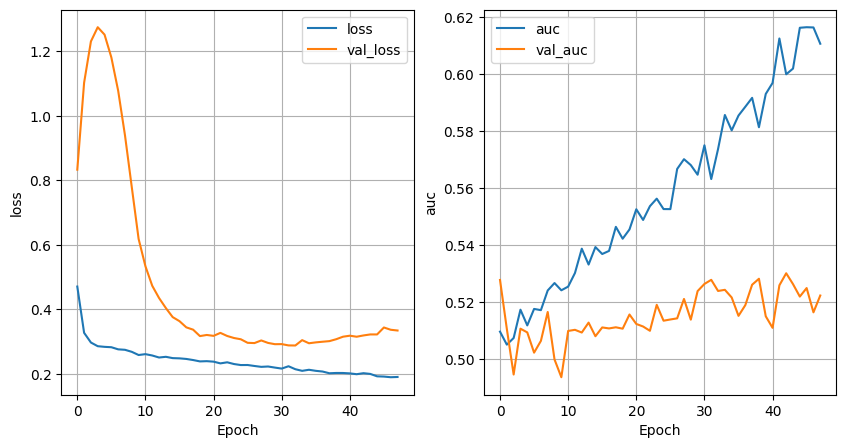

In [29]:
keys = list(history.history.keys())

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes.reshape(-1, 1)


for idx, ax in enumerate(axes): 

    axes[idx].plot(history.history[keys[idx]], label=keys[idx])
    axes[idx].plot(history.history["val_" + keys[idx]], label = "val_" + keys[idx])
    axes[idx].set_xlabel('Epoch')
    axes[idx].set_ylabel(keys[idx])
    axes[idx].legend()
    axes[idx].grid(True)

test_loss, auc,test_acc = model.evaluate(full_gen, verbose=2); 
print("\n\nLoss on test set {:.3},  Categorical accuracy on test set {:.3f}, AUC {:.3f}".format(test_loss, test_acc, auc))

In [30]:

model.save('../models/poke_type_v2.2(0.5acc).h5')
print("✅ Model saved")

✅ Model saved


c:\Users\halod\.pyenv\pyenv-win\versions\3.10.11\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
